In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [9]:
import sqlite3
import csv

conn = sqlite3.connect("C:\\Users\\stepk\\PycharmProjects\\py-restaurant-data-analysis\\db.sqlite3")
cur = conn.cursor()
data = cur.execute("SELECT * FROM restaurant_orderitem JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id")

with open("restaurant_data.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["id", "id1", "id2", "quantity", "id3",  "datatime", "not_needed", "price", "name"])
    writer.writerows(data)



# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [10]:
df = pd.read_csv("C:\\Users\\stepk\\PycharmProjects\\py-restaurant-data-analysis\\app\\restaurant_data.csv")
df = df.loc[:, ["quantity", "datatime", "price", "name"]]
df

,quantity,datatime,price,name
0,6,2019-08-03 20:25:00,0.80,Plain Papadum
1,240,2019-08-03 20:25:00,12.95,King Prawn Balti
2,19,2019-08-03 20:25:00,2.95,Garlic Naan
3,36,2019-08-03 20:25:00,3.95,Mushroom Rice
4,111,2019-08-03 20:25:00,8.95,Paneer Tikka Masala
...,...,...,...,...
74813,247,2016-05-18 18:53:00,17.95,House Red wine 75cl
74814,247,2016-05-14 19:28:00,17.95,House Red wine 75cl
74815,247,2016-05-10 13:18:00,17.95,House Red wine 75cl
74816,248,2016-04-07 19:04:00,17.95,House white wine 75cl


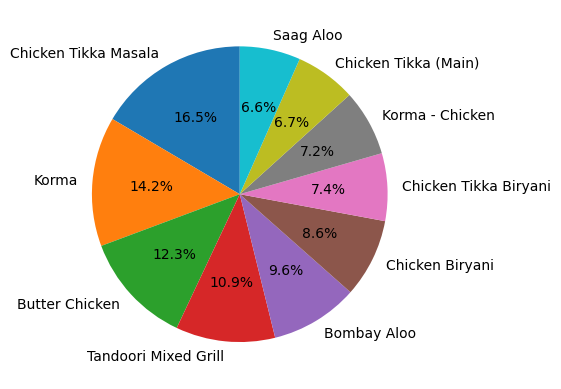

In [11]:

amount_of_sells = df.groupby("name").sum()["quantity"].copy()
amount_of_sells.sort_values(ascending=False, inplace=True)
amount_of_sells = amount_of_sells[:10]

plt.pie(amount_of_sells, labels=amount_of_sells.index, autopct="%.1f%%", startangle=90)
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

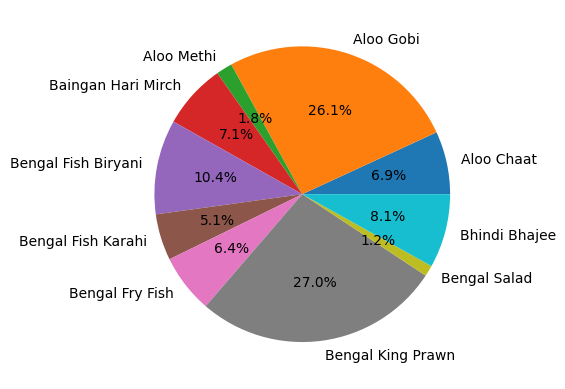

In [17]:
# write your code here
quantity = df.groupby("name").sum()["quantity"].copy()
price = df.groupby("name").mean()["price"].copy()
total_price = price * quantity
plt.pie(total_price[:10], labels = total_price[:10].index, autopct="%.1f%%")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<BarContainer object of 23 artists>

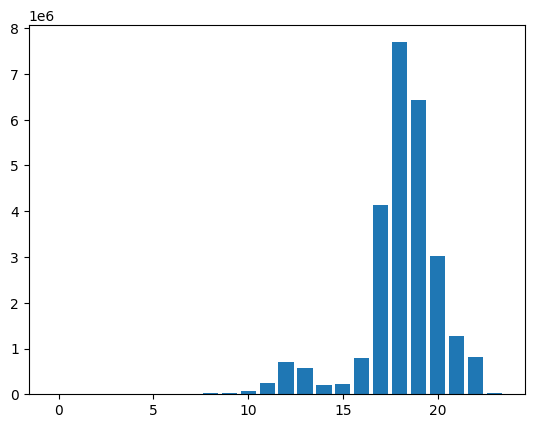

In [60]:
# write your code here
df["datatime"] = pd.to_datetime(df["datatime"])
hours = df.groupby(df["datatime"].dt.hour)
sum = hours.sum()["quantity"]
price = hours.mean()["price"]
total_price = price * sum
plt.bar(total_price.index, total_price)


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<BarContainer object of 7 artists>

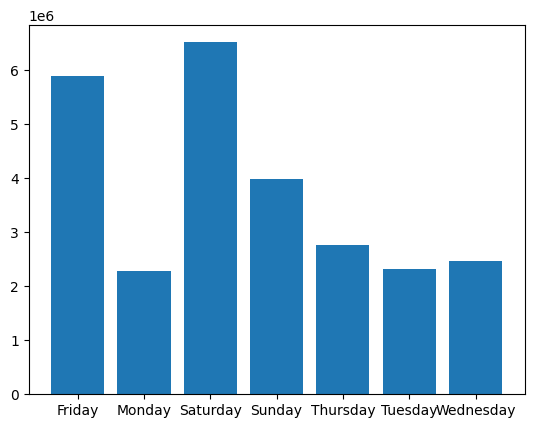

In [62]:
# write your code here
days_of_the_week = df.groupby(df["datatime"].dt.day_name())
quantity = days_of_the_week.sum()["quantity"]
price = days_of_the_week.mean()["price"]
total_income = price * quantity
plt.bar(total_income.index, total_income)